In [23]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

Position confined to some 1D path: $x=x(\theta)$ and $y=y(\theta)$ A few examples

* Parabola: $x = \theta$ and $y=\theta^2$
* Simple Pendulum: $x = \cos(\theta)$ and $y=\sin(\theta)$
* Tautochrone: $x = \sin(2\theta) + 2\theta$ and $y=1-\cos(2 \theta)$
* Many more ...
    

Kinetic Energy: $ T = \frac{1}{2}m (\dot{x}^2 + \dot{y}^2) $

Potential Energy: $ V = mgy $

The Lagrangian: $L = T- V $

Lagranges Equation: $\frac{dL}{d\theta} - \frac{d}{dt} \frac{dL}{d\dot{\theta}} = 0$

In [38]:
# Defining the variables
t, m, g = sp.symbols('t m g')
the = sp.Function(r'\theta')(t)
d_the = sp.diff(the, t)
dd_the = sp.diff(the, t, 2)

Make sure the $x$ and $y$ are function of $\theta$.

In [39]:
x, y = sp.symbols('x y', cls=sp.Function)
x = x(the)
y = y(the)

In [40]:
# Defining the Lagrangian
T = (1/2)*m*(sp.diff(x, t)**2 + sp.diff(y, t)**2)
V = m*g*y
L = T - V

# define the x and y
path = 'taut'
if path == 'taut':
    x = sp.sin(2*the) + 2*the
    y = 1 - sp.cos(2*the)
    x_f = sp.lambdify(the, x)
    y_f = sp.lambdify(the, y)
    
    LE = sp.diff(L, the) - sp.diff(sp.diff(L, d_the), t)
    LE = LE.simplify()
    
    derv_2 = sp.solve(LE, dd_the)[0]
    derv_1 = d_the

    
if path == 'parab':
    x = the
    y = the**2
    x_f = sp.lambdify(the, x)
    y_f = sp.lambdify(the, y)
    
    LE = sp.diff(L, the) - sp.diff(sp.diff(L, d_the), t)
    LE = LE.simplify()
    
    derv_2 = sp.solve(LE, dd_the)[0]
    derv_1 = d_the
    
if path == 'pendulum':
    x = sp.cos(the)
    y = sp.sin(the)
    x_f = sp.lambdify(the, x)
    y_f = sp.lambdify(the, y)
    
    LE = sp.diff(L, the) - sp.diff(sp.diff(L, d_the), t)
    LE = LE.simplify()
    
    derv_2 = sp.solve(LE, dd_the)[0]
    derv_1 = d_the

In [27]:
# Defining the Lagrangian
T = (1/2)*m*(sp.diff(x, t)**2 + sp.diff(y, t)**2)
V = m*g*y
L = T - V

In [28]:
L

-g*m*(1 - cos(2*\theta(t))) + 0.5*m*((2*cos(2*\theta(t))*Derivative(\theta(t), t) + 2*Derivative(\theta(t), t))**2 + 4*sin(2*\theta(t))**2*Derivative(\theta(t), t)**2)

In [29]:
LE = sp.diff(L, the) - sp.diff(sp.diff(L, d_the), t)
LE = LE.simplify()
LE

m*(-2.0*g*sin(2*\theta(t)) + 8.0*sin(2*\theta(t))*Derivative(\theta(t), t)**2 - 8.0*cos(2*\theta(t))*Derivative(\theta(t), (t, 2)) - 8.0*Derivative(\theta(t), (t, 2)))

Solve for $d^2 \theta / dt^2 $ so we can solve it with an ODE solver. Our system of equations will then be

$$ \frac{d \theta}{dt} = \omega$$
$$\frac{d \omega}{dt} = \frac{d^2 \theta}{dt^2} =  \text{whatever is returned} $$

In [30]:
derv_2 = sp.solve(LE, dd_the)[0]
derv_1 = d_the

In [31]:
derv_2

0.25*(-g + 4.0*Derivative(\theta(t), t)**2)*tan(\theta(t))

In [32]:
deriv_1_f = sp.lambdify(d_the, d_the)
deriv_2_f = sp.lambdify((g, the, d_the), derv_2)

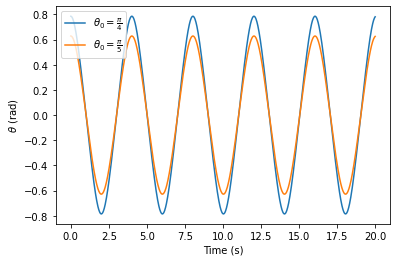

In [41]:
# Defining the ODE
def dsdt(y, t):
    return [deriv_1_f(y[1]), deriv_2_f(g, y[0], y[1])]

t = np.linspace(0, 20, 1000)
g = 9.81
ans1 = odeint(dsdt, y0=[np.pi/4, 0], t=t)
ans2 = odeint(dsdt, y0=[np.pi/5, 0], t=t)

x1 = ans1.T[0]
x2 = ans2.T[0]

plt.plot(t, x1, label=r'$\theta_0 = \frac{\pi}{4}$')
plt.plot(t, x2, label=r'$\theta_0 = \frac{\pi}{5}$')
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ (rad)')
plt.legend()
plt.show()

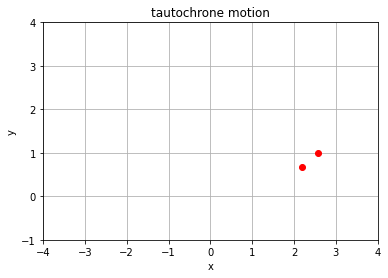

In [42]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

x1, y1 = get_xy(x1)
x2, y2 = get_xy(x2)

def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    ln2.set_data([x2[i]], [y2[i]])
    
fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([], [], 'ro')
ln2, = plt.plot([], [], 'ro')
ax.set_ylim(-1, 4)
ax.set_xlim(-4,4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('tautochrone motion')
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('taut.gif',writer='pillow',fps=50)

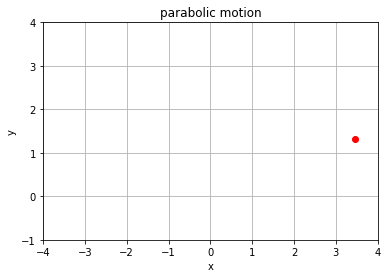

In [43]:
path = 'parab'

def get_xy(theta):
    return x_f(theta), y_f(theta)

x1, y1 = get_xy(x1)
x2, y2 = get_xy(x2)

def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    ln2.set_data([x2[i]], [y2[i]])
    
fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([], [], 'ro')
ln2, = plt.plot([], [], 'ro')
ax.set_ylim(-1, 4)
ax.set_xlim(-4,4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('parabolic motion')
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('parabolic.gif',writer='pillow',fps=50)

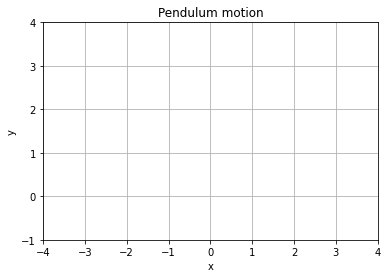

In [44]:
path = 'pendulum'

def get_xy(theta):
    return x_f(theta), y_f(theta)

x1, y1 = get_xy(x1)
x2, y2 = get_xy(x2)

def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    ln2.set_data([x2[i]], [y2[i]])
    
fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([], [], 'ro')
ln2, = plt.plot([], [], 'ro')
ax.set_ylim(-1, 4)
ax.set_xlim(-4,4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Pendulum motion')
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=50)